In [1]:
import numpy as np

In [43]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [44]:
classifier = Sequential()

Convolution Step:

In [45]:
classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3), activation='relu'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


Pooling

In [46]:
classifier.add(MaxPool2D(pool_size= (2,2)))

In [ ]:
# Adding Second  conc. layer
classifier.add(Convolution2D(32,3,3, activation='relu'))
# now add maxpool2d
classifier.add(MaxPool2D(pool_size= (2,2)))

In [47]:
classifier.add(Flatten())

In [48]:
classifier.add(Dense(output_dim = 128,activation='relu'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128, activation="relu")`
  """Entry point for launching an IPython kernel.


In [49]:
classifier.add(Dense(output_dim = 1, activation='sigmoid'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid")`
  """Entry point for launching an IPython kernel.


In [50]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [51]:
# Image Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
        '/home/science/images/Convolutional_Neural_Networks/dataset/training_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/home/science/images/Convolutional_Neural_Networks/dataset/test_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
classifier.fit_generator(
        train_set,
        steps_per_epoch=200,      #2000
        epochs=5,                 #25
        validation_data=test_set,
        validation_steps=800)

Epoch 1/5
200/200 [==============================] - 105s 527ms/step - loss: 0.7778 - accuracy: 0.5853 - val_loss: 0.5561 - val_accuracy: 0.6657
Epoch 2/5
200/200 [==============================] - 103s 515ms/step - loss: 0.6049 - accuracy: 0.6764 - val_loss: 0.6282 - val_accuracy: 0.6695
Epoch 3/5
200/200 [==============================] - 104s 519ms/step - loss: 0.5899 - accuracy: 0.6867 - val_loss: 0.5621 - val_accuracy: 0.7008
Epoch 4/5
199/200 [============================>.] - ETA: 0s - loss: 0.5629 - accuracy: 0.7101

In [52]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [53]:
classifier.predict(test_set)

array([[0.48479858],
       [0.4625263 ],
       [0.48367238],
       ...,
       [0.49267966],
       [0.51609755],
       [0.47848704]], dtype=float32)

[[1.]]
{'dogs': 1, 'cats': 0}


In [54]:
import matplotlib.pyplot as plt

In [55]:
im = plt.imread('/home/science/images/Convolutional_Neural_Networks/dataset/single_prediction/cat_or_dog_1.jpg')

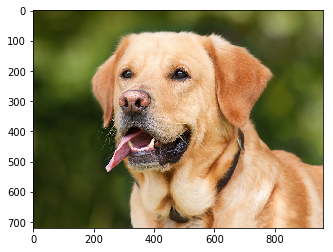

In [56]:
plt.imshow(im)
plt.show()

In [61]:
import numpy as np
from keras.preprocessing import image


test_image = image.load_img('/home/science/images/Convolutional_Neural_Networks/dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)


result = classifier.predict(test_image)
print (result)

#print (train_set.class_indices)


[[0.00041471]]


In [38]:
classifier.save('cat_dog_recog_model.h5')

In [39]:
!ls cat_dog*

cat_dog_recog_model  cat_dog_recog_model.h5


In [37]:
!pwd

/home/science
